In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"Indian Airlines.csv")
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [3]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [4]:
#Checking missing values
df.isnull() .sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('Indian Airlines.csv')

# 2. Handle missing values (NaN)
# Drop rows with missing values or fill them with appropriate values (mean, median, mode, etc.)
df = df.dropna()  # Option to drop missing rows

# 3. Remove duplicate rows if any
df = df.drop_duplicates()



# View cleaned dataset
print(df.head())


   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


In [5]:
#The code prints unique values from string or mixed-type columns in a DataFrame

for col in df:
# Check if the column's data type is 'object' (usually for strings or mixed data)
    if df[col].dtype == 'object':
# Print all the unique values in the column
        print(df[col].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


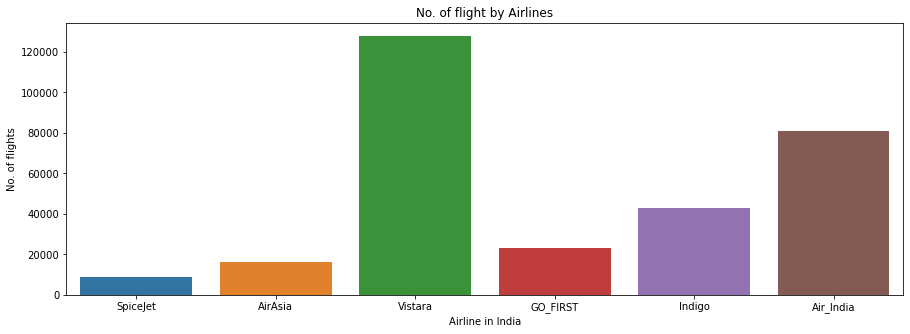

In [6]:
# Number of flights for each airline in India

from turtle import title
plt.figure(figsize=(15,5))
NF = sns.countplot(x='airline', data = df)
NF.set(xlabel='Airline in India', ylabel='No. of flights', title='No. of flight by Airlines')
plt.show(NF)

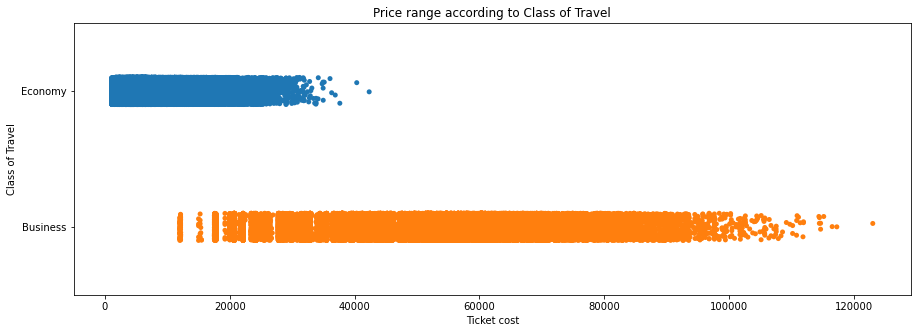

In [7]:
# Price range according to Class of Travel

from turtle import title
plt.figure(figsize=(15,5))
CE = sns.stripplot(x='price', y='class', data = df)
CE.set(xlabel='Ticket cost', ylabel='Class of Travel', title='Price range according to Class of Travel')
plt.show(CE)

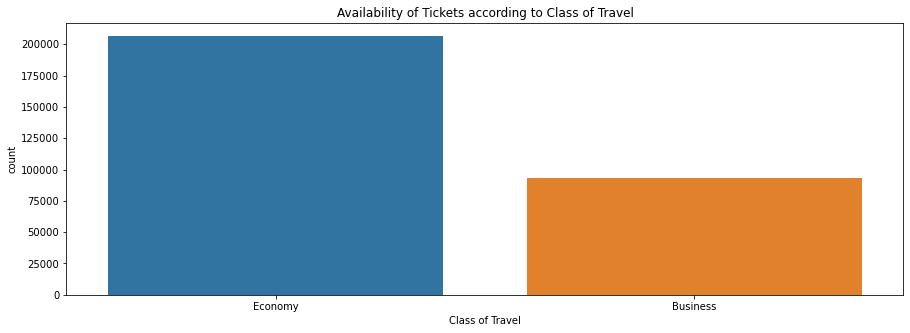

In [8]:
# Availability of Tickets according to Class of Travel

from turtle import title
plt.figure(figsize=(15,5))
TA = sns.countplot(x='class', data = df)
TA.set(xlabel='Class of Travel', title='Availability of Tickets according to Class of Travel')
plt.show(TA)

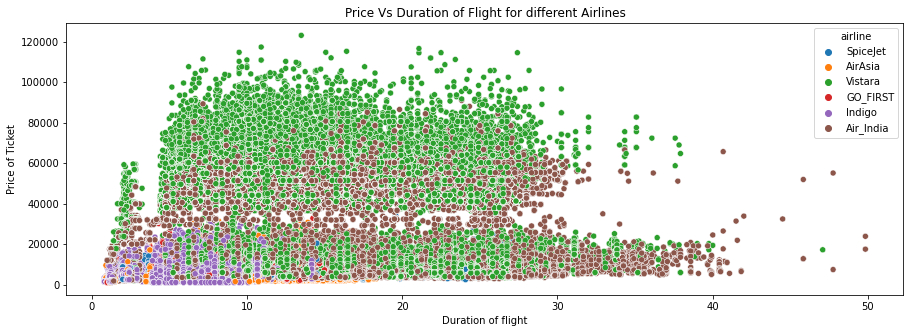

In [9]:
# Price Vs Duration of Flight for different Airlines

plt.figure(figsize=(15,5))
PD = sns.scatterplot(df['duration'], df['price'], hue= df['airline'])
PD.set(xlabel='Duration of flight', ylabel='Price of Ticket', title='Price Vs Duration of Flight for different Airlines')
plt.show(PD)

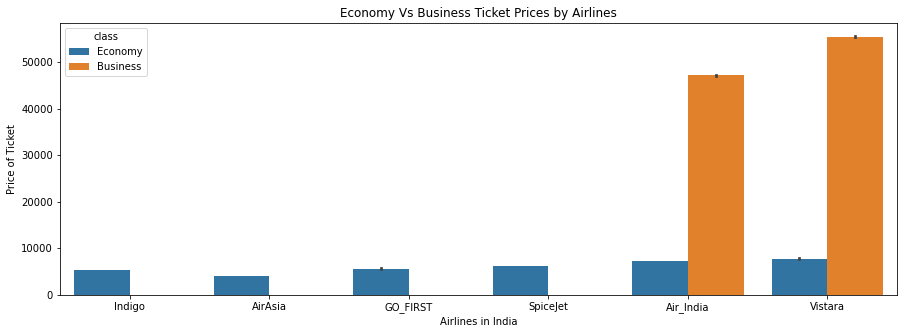

In [10]:
# Economy Vs Business Ticket Prices by Airlines

plt.figure(figsize=(15,5))
AS = sns.barplot(x='airline', y='price', hue='class', data = df.sort_values('price'))
AS.set(xlabel='Airlines in India', ylabel='Price of Ticket', title='Economy Vs Business Ticket Prices by Airlines')
plt.show(AS)

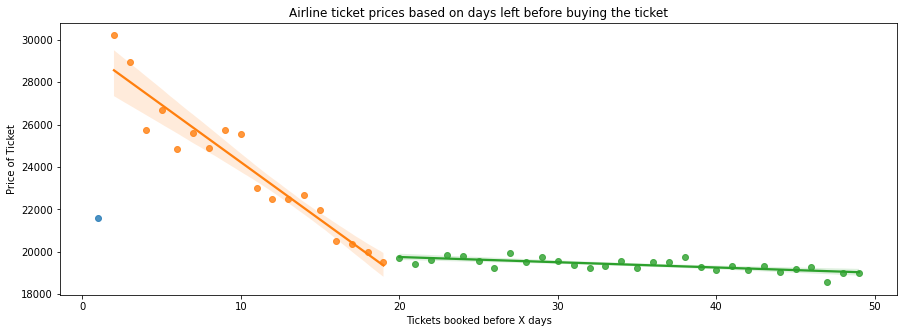

In [11]:
# Airline ticket prices based on days left before buying the ticket
'''Orange Dots: Average prices for tickets booked 1 day in advance (with regression line)
   Green Dots: Average prices for tickets booked 2-19 days in advance (with regression line)
   Blue Dots: Average prices for tickets booked 20+ days in advance '''
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
ax = plt.axes()
sns.regplot(x = df_temp.loc[df_temp['days_left'] == 1].days_left, y = df_temp.loc[df_temp['days_left'] == 1].price, data= df_temp, fit_reg= False, ax=ax)
sns.regplot(x = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].days_left, y = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].price, data = df_temp, fit_reg= True, ax=ax)
sns.regplot(x = df_temp.loc[df_temp['days_left'] >= 20].days_left, y = df_temp.loc[df_temp['days_left'] >= 20].price, data = df_temp, fit_reg= True, ax=ax)
ax.set(xlabel='Tickets booked before X days', ylabel='Price of Ticket', title='Airline ticket prices based on days left before buying the ticket')
plt.show(ax)

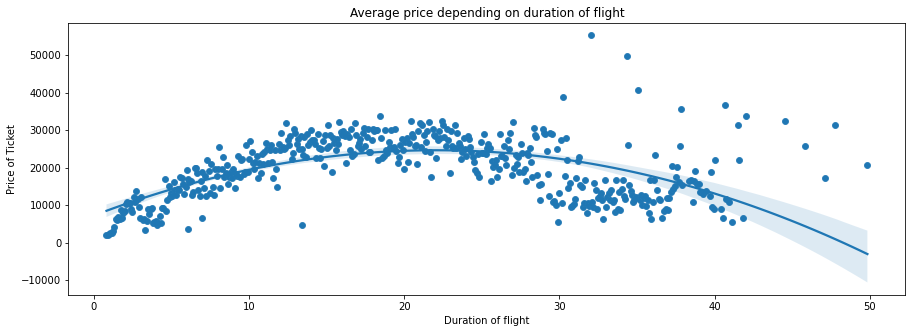

In [12]:
# Average price depending on duration of flight

df_temp2 = df.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
PD = sns.scatterplot(x='duration', y='price', data = df_temp2)
PD = sns.regplot(x='duration', y='price', data = df_temp2, order = 2)
PD.set(xlabel='Duration of flight', ylabel='Price of Ticket', title='Average price depending on duration of flight')
plt.show(PD)

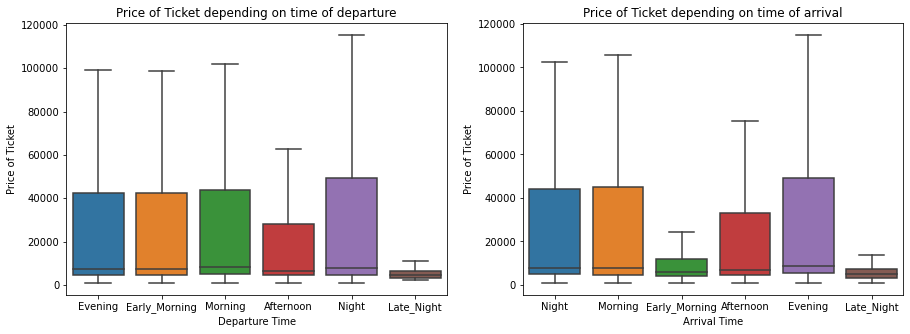

In [13]:
''' Left Box Plot: Shows how ticket prices vary depending on the departure time, without displaying any outlier prices.
Right Box Plot: Shows how ticket prices vary based on the arrival time, also without outlier prices.'''

plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
sns.boxplot(data = df, x = 'departure_time', y = 'price', showfliers = False).set(xlabel = 'Departure Time', ylabel = 'Price of Ticket', title ='Price of Ticket depending on time of departure')
plt.subplot (1,2,2)
sns.boxplot(data = df, x = 'arrival_time', y = 'price', showfliers =  False).set(xlabel = 'Arrival Time', ylabel = 'Price of Ticket', title = 'Price of Ticket depending on time of arrival')
plt.show()

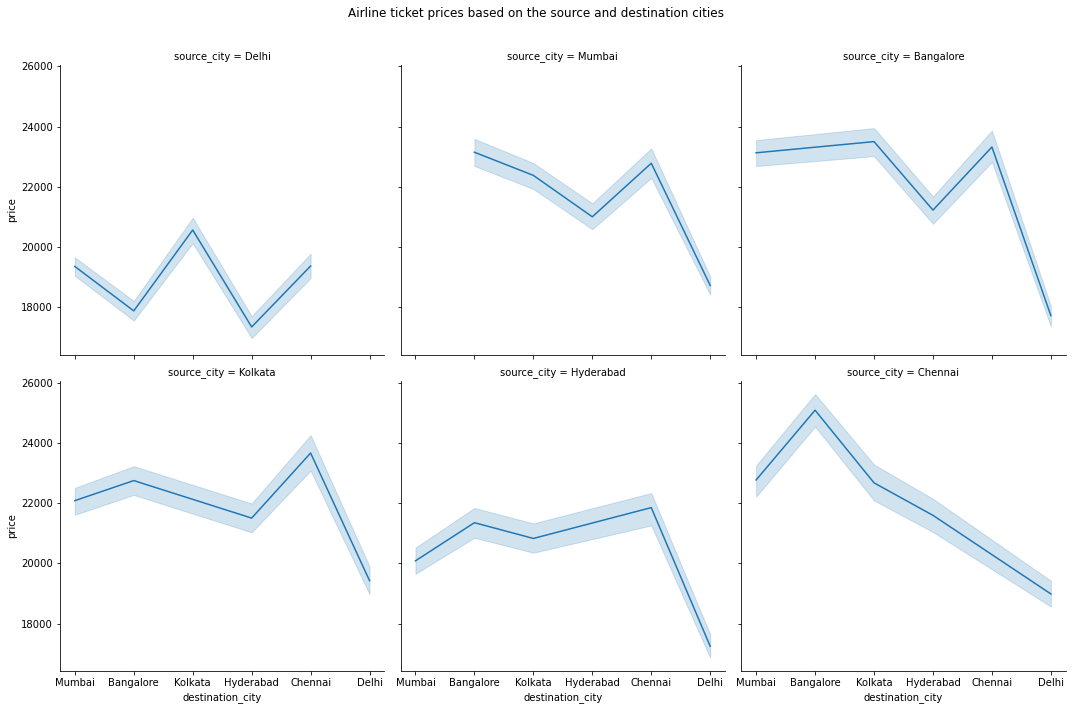

In [14]:
# Each plot shows the relationship between ticket prices and destination cities for a specific source city.

ax = sns.relplot(x = 'destination_city', y = 'price', col='source_city', col_wrap= 3, kind= 'line', data = df)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline ticket prices based on the source and destination cities')
plt.show(ax)

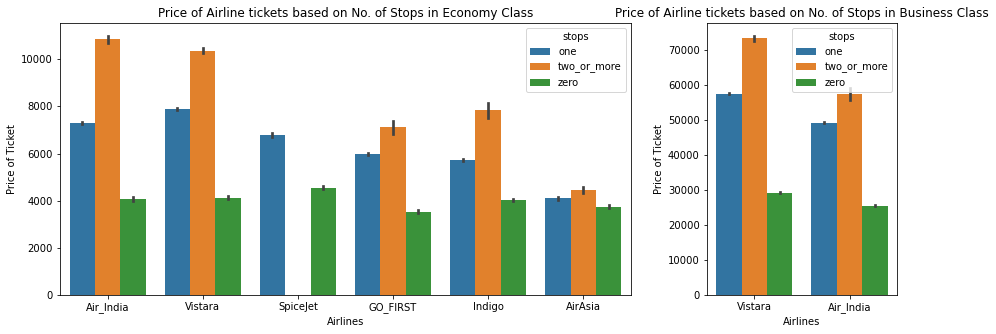

In [15]:
# Comparing airline ticket prices for Economy and Business classes based on the number of stops

fig, axs = plt.subplots(1,2, gridspec_kw= {'width_ratios': [3,1]}, figsize = (15,5))
sns.barplot(y = 'price', x = 'airline', hue = 'stops', data = df.loc[df['class'] == 'Economy'].sort_values('price', ascending= False), ax = axs[0])
axs[0].set(xlabel='Airlines', ylabel='Price of Ticket', title='Price of Airline tickets based on No. of Stops in Economy Class')
sns.barplot(y='price', x='airline', hue='stops', data= df.loc[df['class'] == 'Business'].sort_values('price', ascending= False), ax = axs[1])
axs[1].set(xlabel='Airlines', ylabel='Price of Ticket', title='Price of Airline tickets based on No. of Stops in Business Class')
plt.show(fig, axs)

In [16]:
# The code normalizes the duration, days_left, and price columns in the DataFrame to a range between 0 and 1.

'''Normalization ensures that all features have a consistent scale, 
improves convergence speed in algorithms, enhances performance in distance-based methods, 
and can help mitigate the influence of outliers.'''

from sklearn.preprocessing import MinMaxScaler
# Select numeric columns for normalization
numeric_columns = ['duration', 'days_left', 'price']
# Initialize the Min-Max Scaler
scaler = MinMaxScaler()
# Apply the scaler to the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
# Show the first few rows of the normalized dataset
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,0.027347,0.0,0.039749
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0.030612,0.0,0.039749
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0.027347,0.0,0.039773
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0.028980,0.0,0.039765
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,0.030612,0.0,0.039765


In [17]:
# LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
# Convert 'price' into two categories: Low and High
threshold = df['price'].median()  # Using the median price as the threshold
df['price_category'] = np.where(df['price'] > threshold, 1, 0)  # 1 for High price, 0 for Low price
# Drop the original 'price' column
df = df.drop('price', axis=1)
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['airline', 'flight', 'source_city', 'departure_time', 
                                 'stops', 'arrival_time', 'destination_city', 'class'])
# Select the features (X) and target (y)
X = df.drop('price_category', axis=1)  # Features
y = df['price_category']               # Target
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
# Display the results

Accuracy: 0.49807599406973063
Confusion Matrix:
[[    1 30131]
 [    0 29899]]


In [18]:
# DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Load your dataset
df = pd.read_csv('Indian Airlines.csv')
# Example: If you need to create a 'price_category' column based on price ranges
# You can categorize prices into low, medium, and high
df['price_category'] = pd.cut(df['price'], bins=[0, 3000, 7000, np.inf], labels=['Low', 'Medium', 'High'])
# Drop irrelevant columns and encode categorical variables
df = df.drop(columns=['Unnamed: 0', 'flight'])  # Remove unnecessary columns
# Encode categorical features
le = LabelEncoder()
categorical_columns = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops', 'class']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
# Select the features (X) and target (y)
X = df.drop('price_category', axis=1)  # Features
y = df['price_category']               # Target
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)
# Train the model
tree_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = tree_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Display the results
print(f"Accuracy: {accuracy:.3f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 1.000
Confusion Matrix:
[[31310     0     0]
 [    0  4494     0]
 [    0     0 24227]]


In [19]:
# RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Load your dataset
df = pd.read_csv('Indian Airlines.csv')
# Create a 'price_category' column by categorizing prices into low, medium, and high
df['price_category'] = pd.cut(df['price'], bins=[0, 3000, 7000, np.inf], labels=['Low', 'Medium', 'High'])
# Drop irrelevant columns and encode categorical variables
df = df.drop(columns=['Unnamed: 0', 'flight'])  # Remove unnecessary columns
# Encode categorical features using LabelEncoder
le = LabelEncoder()
categorical_columns = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops', 'class']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
# Select the features (X) and target (y)
X = df.drop('price_category', axis=1)  # Features
y = df['price_category']               # Target
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Display the results
print(f"Accuracy: {accuracy:.3f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 1.000
Confusion Matrix:
[[31310     0     0]
 [    0  4494     0]
 [    0     0 24227]]


In [20]:
# Naive Bayes Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
# Load your dataset
df = pd.read_csv('Indian Airlines.csv')
# Create a 'price_category' column by categorizing prices into low, medium, and high
df['price_category'] = pd.cut(df['price'], bins=[0, 3000, 7000, np.inf], labels=['Low', 'Medium', 'High'])
# Drop irrelevant columns and encode categorical variables
df = df.drop(columns=['Unnamed: 0', 'flight'])  # Remove unnecessary columns
# Encode categorical features using LabelEncoder
le = LabelEncoder()
categorical_columns = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops', 'class']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
# Select the features (X) and target (y)
X = df.drop('price_category', axis=1)  # Features
y = df['price_category']               # Target
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Naive Bayes Classifier
nb_model = GaussianNB()
# Train the model
nb_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = nb_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Display the results
print(f"Accuracy: {accuracy:.3f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.948
Confusion Matrix:
[[28650     0  2660]
 [   17  4299   178]
 [    0   280 23947]]


In [21]:
# Cross Validation
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Load your dataset
data = pd.read_csv('Indian Airlines.csv')
# Drop unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 0', 'flight'])
# Encode categorical features
label_encoders = {}
for column in ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le
# Define features and target
X = data_cleaned.drop(columns=['price'])
# Categorize 'price' into low, medium, high using quantiles
data_cleaned['price_category'] = pd.qcut(data_cleaned['price'], q=3, labels=[0, 1, 2])
y_class = data_cleaned['price_category']
# Models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
# Perform cross-validation for each model
cross_val_results = {}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y_class, cv=5, scoring='accuracy')
    cross_val_results[model_name] = scores.mean()

# Print the cross-validation results
print("Cross-Validation Accuracy Scores:")
for model_name, accuracy in cross_val_results.items():
    print(f"{model_name}: {accuracy:.4f}")


Cross-Validation Accuracy Scores:
Logistic Regression: 0.7793
Naive Bayes: 0.6719
Decision Tree: 0.5910
Random Forest: 0.6827


{'Logistic Regression': 0.9523912645133348, 'GaussianNB': 0.9477769818926888, 'DecisionTree Classifier': 1.0, 'Random Forest': 1.0}


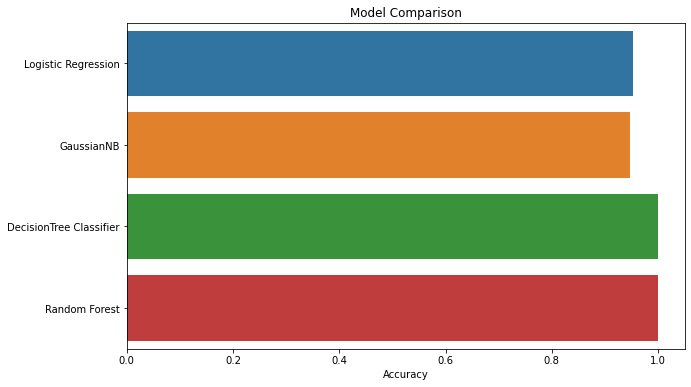

,Accuracy
DecisionTree Classifier,1.000000
Random Forest,1.000000
Logistic Regression,0.952391
GaussianNB,0.947777


In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset
df = pd.read_csv('Indian Airlines.csv')

# Create a 'price_category' column by categorizing prices into low, medium, and high
df['price_category'] = pd.cut(df['price'], bins=[0, 3000, 7000, np.inf], labels=['Low', 'Medium', 'High'])

# Drop irrelevant columns and encode categorical variables
df = df.drop(columns=['Unnamed: 0', 'flight'])  # Remove unnecessary columns

# Encode categorical features using LabelEncoder
le = LabelEncoder()
categorical_columns = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops', 'class']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Select the features (X) and target (y)
X = df.drop('price_category', axis=1)  # Features
y = df['price_category']               # Target

# Split the data into training and test sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "GaussianNB": GaussianNB(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Function to fit and evaluate models
def fit_and_score(models, train_inputs, val_inputs, train_targets, val_targets):
    """
    Fits and evaluates the given machine learning models.
    models: A dictionary of Scikit-learn ML models
    train_inputs: Training features
    val_inputs: Validation features
    train_targets: Training labels
    val_targets: Validation labels
    """
    
    # Dictionary to store model scores
    model_scores = {}
    
    # Loop through each model
    for name, model in models.items():
        # Fit the model
        model.fit(train_inputs, train_targets)
        # Evaluate the model
        model_scores[name] = model.score(val_inputs, val_targets)
        
    return model_scores

# Set a seed for reproducibility
np.random.seed(42)

# Train all models and store their scores
model_scores = fit_and_score(models, train_inputs, val_inputs, train_targets, val_targets)

# Print model scores
print(model_scores)

# Plotting a bar graph of the model scores
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
plt.figure(figsize=(10, 6))
sns.barplot(model_compare.T['Accuracy'], model_compare.T.index, orient="h")
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.show()

# Rearranging the scores in descending order
model_compare.T.sort_values(by="Accuracy", ascending=False)


In [ ]:
#DecisionTree Classifier (100% accurate)
#Random Forest (100% accurate): 
#Logistic Regression (95.2% accurate)
#GaussianNB (94.8% accurate)

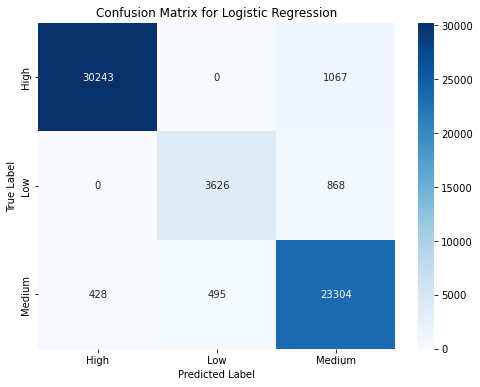

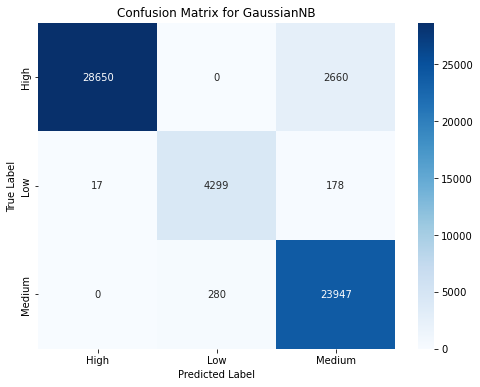

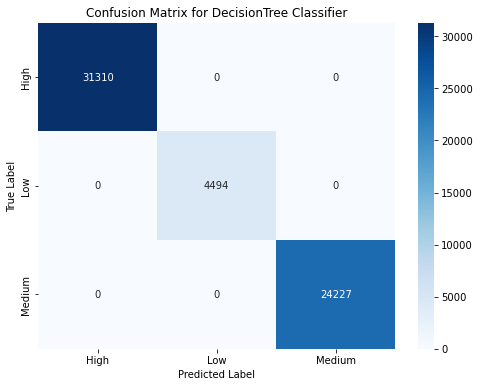

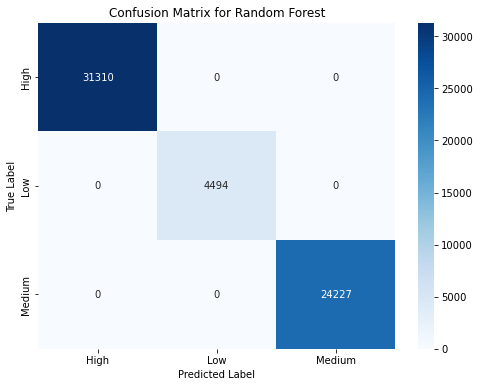

In [20]:
# Confusion Matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Load your dataset
df = pd.read_csv('Indian Airlines.csv')
# Create a 'price_category' column by categorizing prices into low, medium, and high
df['price_category'] = pd.cut(df['price'], bins=[0, 3000, 7000, np.inf], labels=['Low', 'Medium', 'High'])
# Drop irrelevant columns and encode categorical variables
df = df.drop(columns=['Unnamed: 0', 'flight'])  # Remove unnecessary columns
# Encode categorical features using LabelEncoder
le = LabelEncoder()
categorical_columns = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'stops', 'class']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
# Select the features (X) and target (y)
X = df.drop('price_category', axis=1)  # Features
y = df['price_category']               # Target
# Split the data into training and test sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(X, y, test_size=0.2, random_state=42)
# Define the models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "GaussianNB": GaussianNB(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}
# Function to fit models and display confusion matrix
def fit_and_evaluate_with_confusion_matrix(models, train_inputs, val_inputs, train_targets, val_targets):
    """
    Fits the given machine learning models and displays the confusion matrix for each.
    models: A dictionary of Scikit-learn ML models
    train_inputs: Training features
    val_inputs: Validation features
    train_targets: Training labels
    val_targets: Validation labels
    """
 
    # Loop through each model
    for name, model in models.items():
        # Fit the model
        model.fit(train_inputs, train_targets)
        # Make predictions on validation data
        predictions = model.predict(val_inputs)
        
        # Compute confusion matrix
        cm = confusion_matrix(val_targets, predictions)
        
        # Display confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=model.classes_, 
                    yticklabels=model.classes_)
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

# Set a seed for reproducibility
np.random.seed(42)

# Train all models and display confusion matrices
fit_and_evaluate_with_confusion_matrix(models, train_inputs, val_inputs, train_targets, val_targets)
